Import dos pacotes

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,  mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.cluster import DBSCAN

Opcoes para visualizar todas as linhas e colunas ao exibir a base de dados no console

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Importacao da base de dados

In [ ]:
df_obesidade = pd.read_csv(r"https://raw.githubusercontent.com/pcmassonjr/ProjetoAplicado3/refs/heads/main/Base%20de%20Dados/obesidade.csv", sep=",", encoding='latin-1')

Visualizando a quantidade de registros linhas x colunas

In [ ]:
print(df_obesidade.shape)

(2111, 17)


Visualizando os dados

In [ ]:
display(df_obesidade.head(10))

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Visualizando a tipagem dos dados

In [ ]:
print(df_obesidade.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


Verificando valores ausentes

In [ ]:
print('\nSoma dos valores nulos em cada coluna\n')
print(df_obesidade.isna().sum())
print('\nLinhas antes de dropna: ', len(df_obesidade))


Soma dos valores nulos em cada coluna

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Linhas antes de dropna:  2111


Apagando valores ausentes

In [ ]:
df_obesidade = df_obesidade.dropna()
print('\nLinhas depois de dropna: ', len(df_obesidade))


Linhas depois de dropna:  2111


Removendo colunas do dataFrame

In [ ]:
colunas_para_remover = [
    'Gender', 'Height', 'Weight', 'family_history_with_overweight', 
    "NCP", 'SMOKE', 'CH2O', 'TUE', 'CALC', 'MTRANS'
]
df_obesidade = df_obesidade.drop(columns = colunas_para_remover)

Exploracao

Verificando a distribuicao por tipo de peso

<Axes: xlabel='NObeyesdad'>

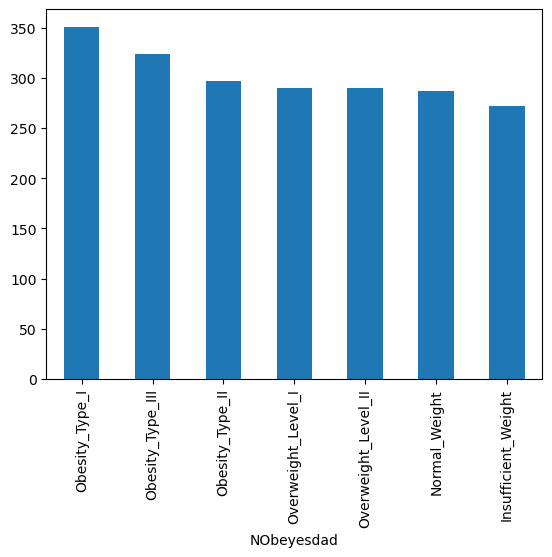

In [ ]:
df_obesidade['NObeyesdad'].value_counts().plot(kind='bar')

Avaliacao de outliers por meio de grafico para calcular múltiplos quantis (ex: 0.25, 0.5, 0.75)

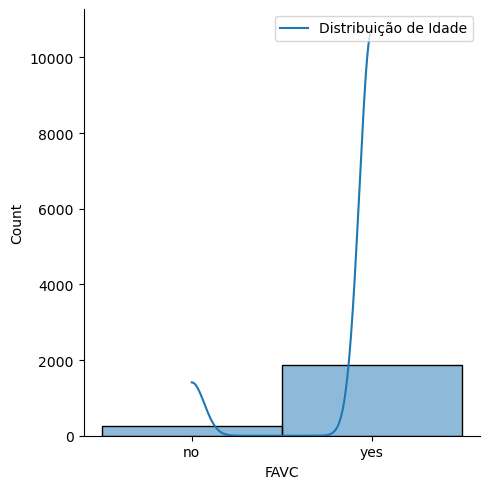

In [ ]:
sns.displot(x=df_obesidade['FAVC'], kde=True)
plt.legend(['Distribuição de Idade'], loc='upper right')
plt.show()

Avaliacao de idade por quartil

In [ ]:
quantis_coluna = df_obesidade['Age'].quantile([0.25, 0.5, 0.75])
print(quantis_coluna)

0.25    19.947192
0.50    22.777890
0.75    26.000000
Name: Age, dtype: float64


Gráfico de dispersão - pares de variáveis

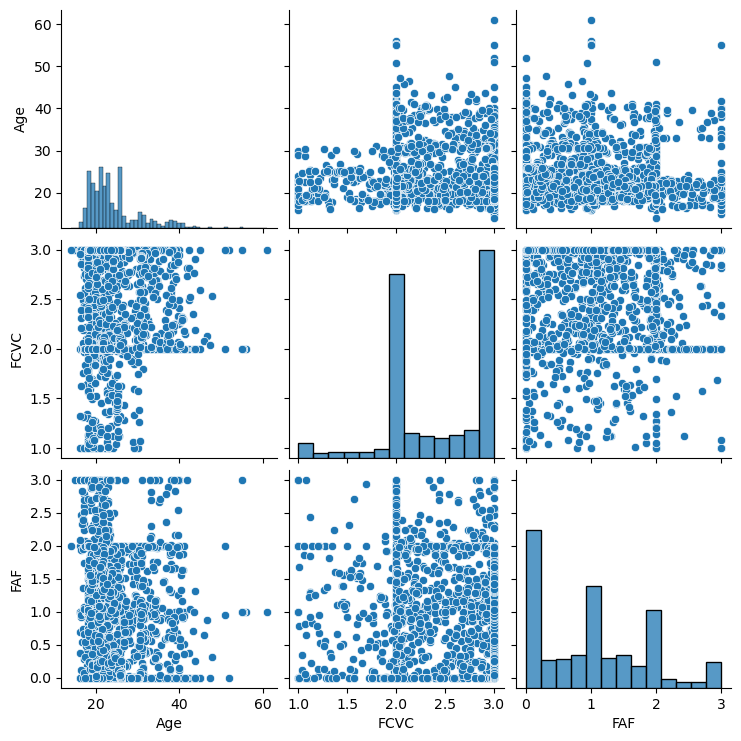

In [ ]:
# Criar um gráfico de dispersão entre todos os pares de variáveis
sns.pairplot(df_obesidade)
plt.show()

Correlação

Usar one-hot encoding para colunas categóricas (criar esse df para heat map com todas as colunas)

In [ ]:
df_encoded_firstfalse = pd.get_dummies(df_obesidade, drop_first=False)

Calcular a matriz de correlação com colunas ordenadas como se apresentam (df_encoded, drop_first=False)

In [ ]:
correlation_matrix = df_encoded_firstfalse.corr()

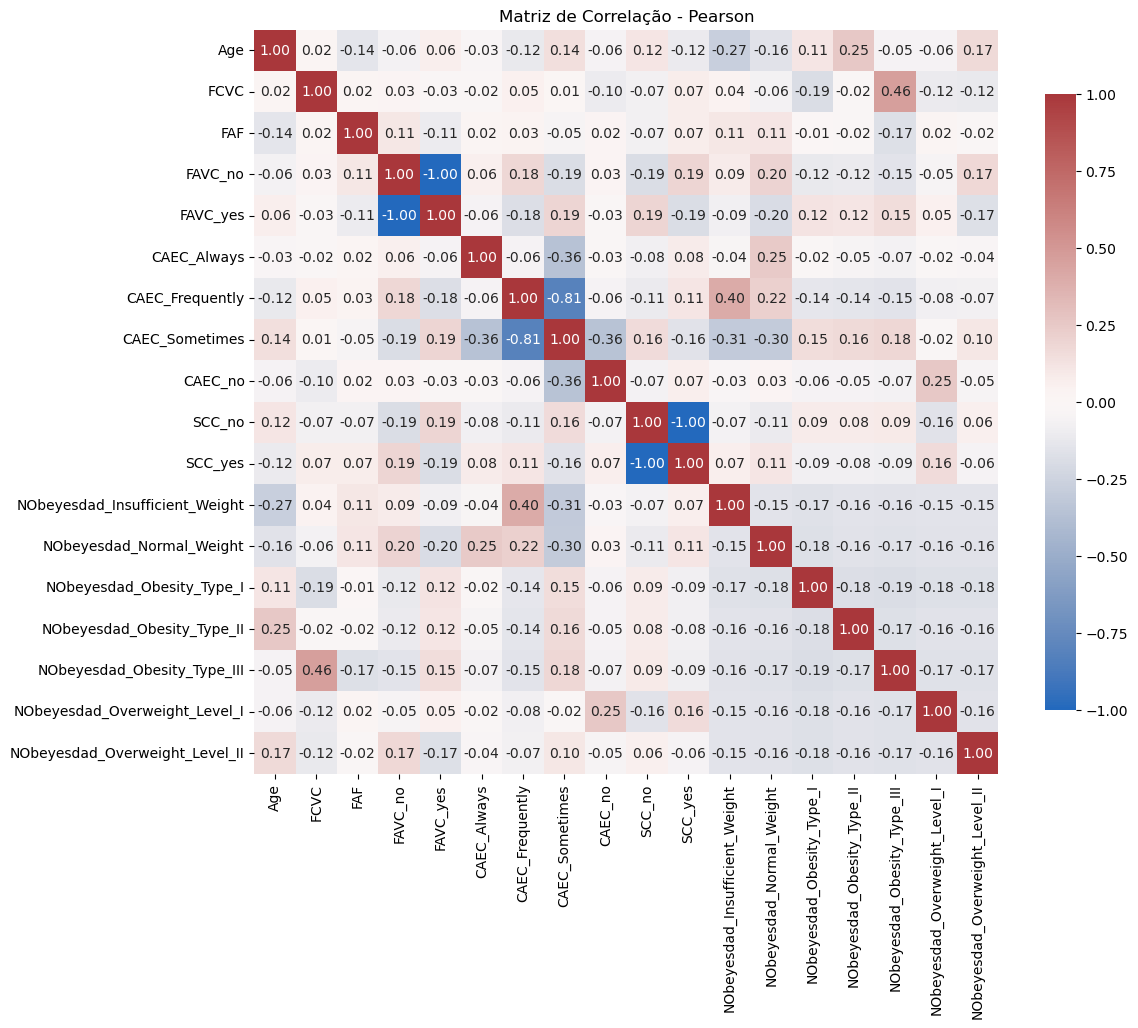

In [ ]:
# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="vlag", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação - Pearson")
plt.show()

Normalização

Criando o scaler

In [ ]:
scaler = MinMaxScaler()

# Aplicando a normalização
df_normalizado = scaler.fit_transform(df_encoded_firstfalse)

# Convertendo de volta para DataFrame
df_normalizado_df = pd.DataFrame(df_normalizado, columns=df_encoded_firstfalse.columns)
display(df_normalizado_df.head(10))

,Age,FCVC,FAF,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.148936,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.148936,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.191489,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.276596,1.0,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.170213,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.319149,0.5,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.191489,1.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.170213,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.212766,1.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.170213,0.5,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Treinamento

In [ ]:
# Parametros do treinamento
eps = 0.7  # Distância máxima para considerar pontos como vizinhos
min_samples = 20  # Número mínimo de pontos para formar um cluster

# Criando e ajustando o modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_normalizado_df)

# Adicionando os rótulos dos clusters ao DataFrame
df_normalizado_df['cluster'] = clusters

Exibindo a contagem de dados por cluster

In [ ]:
# Exibindo os primeiros resultados
display(df_normalizado_df['cluster'].value_counts())


cluster
 3     326
 12    322
 11    287
-1     208
 4     200
 6     192
 7     130
 2     110
 9      82
 1      68
 5      58
 0      38
 10     35
 8      28
 13     27
Name: count, dtype: int64

Exibindo o dataFrame normalizado

In [ ]:
display(df_normalizado_df.head(10))

,Age,FCVC,FAF,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,cluster
0,0.148936,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0.148936,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1
2,0.191489,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.276596,1.0,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1
4,0.170213,0.5,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,0.319149,0.5,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
6,0.191489,1.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
7,0.170213,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
8,0.212766,1.0,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
9,0.170213,0.5,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


Tentativa de interpretar os clusters

In [ ]:
# Filtrar as pessoas com peso normal
peso_normal = df_normalizado_df[df_normalizado_df['NObeyesdad_Normal_Weight'] == 1.0]

# Ver quais clusters têm pessoas com peso normal
clusters_com_peso_normal = peso_normal['cluster'].unique()
print(f"Clusters com pessoas de peso normal: {clusters_com_peso_normal}")

Clusters com pessoas de peso normal: [ 0 -1  2  5]


Agrupar clusters e calcular medias

In [ ]:
# Agrupando por cluster e calculando a média das variáveis
cluster_profiles = df_normalizado_df.groupby('cluster').mean()

# Exibir as características médias de cada cluster
display(cluster_profiles)

,Age,FCVC,FAF,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SCC_no,SCC_yes,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
cluster,,,,,,,,,,,,,,,,,,
-1,0.213577,0.730122,0.417152,0.533654,0.466346,0.254808,0.355769,0.3125,0.076923,0.668269,0.331731,0.153846,0.389423,0.120192,0.048077,0.009615,0.173077,0.105769
0,0.175812,0.605263,0.508772,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.178095,0.645798,0.354374,1.000000,0.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.158414,0.645455,0.348485,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.252553,0.594024,0.325510,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
4,0.307972,0.619348,0.310914,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,0.139765,0.637931,0.385057,0.000000,1.000000,0.000000,1.000000,0.0000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.213334,0.650273,0.387372,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
7,0.094592,0.638610,0.470319,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
